# Reference

Class Handout, Lee, Chia Jung professor, MDM64001, School of Big Data Management, Soochow University

# Data

In [1]:
from sklearn.datasets import load_iris
import pandas as pd


iris = load_iris()
feature = pd.DataFrame(iris['data'], columns = iris['feature_names'])
target = pd.DataFrame(iris['target'], columns = ['class'])
df = pd.concat([feature, target], axis=1)
x = df.iloc[:, [0,1]].values
y = df.iloc[:, 4].values

# Preprocessing

In [2]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x, y , test_size=0.3, random_state=42)

In [3]:
from sklearn.preprocessing import StandardScaler


sc = StandardScaler()
x_train_std = sc.fit_transform(x_train)
x_test_std = sc.transform(x_test)

# Modeling

In [4]:
from sklearn.neighbors import KNeighborsClassifier


knn = KNeighborsClassifier(n_neighbors=1, weights = 'uniform')
knn.fit(x_train_std, y_train)
print('score train/test:%.2f, %.2f' % (knn.score(x_train_std, y_train), knn.score(x_test_std, y_test)))

score train/test:0.96, 0.71


# Evaluation 1

In [9]:
from sklearn.preprocessing import StandardScaler


sc = StandardScaler()
x_std = sc.fit_transform(x)

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


def plot_decision_regions(x, y, classifier, test_idx=None, resolution=0.02):
    markers = ['s', 'x', 'o', '^', 'v']
    colors = ['red', 'blue', 'lightgreen', 'gray', 'cyan']
    cmap = ListedColormap(colors[ : len(np.unique(y))])
    
    x1_min, x1_max = x[:,0].min()-1, x[:,0].max() + 1
    x2_min, x2_max = x[:1].min(), x[:,1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max,resolution), 
                           np.arange(x2_min, x2_max,resolution))
    z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    z = z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, z, alpha=0.3, cmap = cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x = x[y == cl, 0],
                    y = x[y == cl, 1],
                    alpha = 0.8,
                    c = colors[idx],
                    marker = markers[idx],
                    label = cl,
                    edgecolor = 'black')
    
    if test_idx:
        x_test, y_test = x[test_idx, :], y[test_idx]
        plt.scatter(x_test[:,0],
                    x_test[:,1],
                    c = '',
                    edgecolor = 'black',
                    alpha=1.0,
                    linewidth=1,
                    marker = 'o',
                    s=100,
                    label = 'test set')

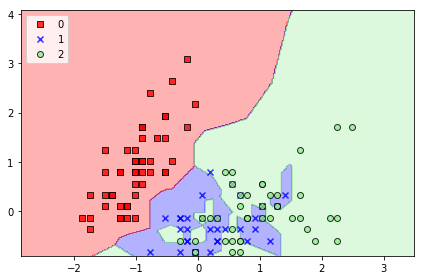

In [8]:
plot_decision_regions(x_std, y, knn, test_idx=None, resolution=0.02)
plt.xlabel('')
plt.ylabel('')
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()

# Evaluation 2

The optimal number of neighbors is 33


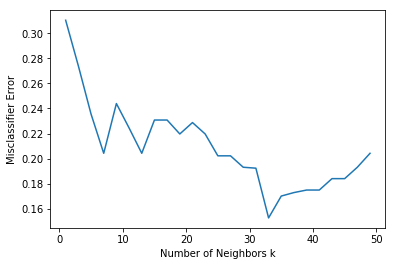

In [11]:
from sklearn.model_selection import cross_val_score


mylist = list(range(1, 50))
neighbors = list(filter(lambda x: x%2!=0, mylist))
cv_scores = []
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn, x_train, y_train,cv=10, scoring = 'accuracy')
    cv_scores.append(scores.mean())
    
MSE = [1-x for x in cv_scores]
optimal_k = neighbors[MSE.index(min(MSE))]
print('The optimal number of neighbors is %d' % optimal_k)
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors k')
plt.ylabel('Misclassifier Error')
plt.show()